<a href="https://colab.research.google.com/github/yds725/nuclear_plant_proj/blob/jisoo/30_182_%ED%8C%8C%EC%9D%BC%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# 모듈 삽입

import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt 
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.patches as patches
import seaborn as sns

In [0]:
# 드라이브에 저장된 데이터 불러오기

data_30 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/project_nuclear/project_nuclear_origin_data/train/30.csv')
data_182 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/project_nuclear/project_nuclear_origin_data/train/182.csv')
data_add_01 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/project_nuclear/project_nuclear_origin_data/additional_data_01.csv')

# **30.csv : label 73**

In [87]:
# describe

data_30_des = data_30.describe()
data_30_std = data_30_des.loc['std']
display(data_30_des)
display(data_30_std)

# std 높은 col은 그만큼 변화가 많다는 의미, 이 col 값들을 자세히 보면?

,time,V0000,V0001,V0002,V0003,V0004,V0005,V0006,V0007,V0008,V0009,V0010,V0011,V0012,V0013,V0014,V0015,V0016,V0017,V0018,V0025,V0026,V0027,V0028,V0029,V0030,V0031,V0032,V0033,V0040,V0041,V0042,V0043,V0044,V0045,V0046,V0047,V0048,V0049,V0050,...,V5004,V5005,V5006,V5007,V5008,V5009,V5010,V5011,V5012,V5013,V5014,V5015,V5016,V5017,V5018,V5019,V5020,V5021,V5022,V5023,V5024,V5025,V5074,V5075,V5076,V5077,V5078,V5079,V5080,V5084,V5085,V5086,V5087,V5088,V5089,V5090,V5116,V5117,V5118,V5120
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,5.800000e+02,5.800000e+02,5.800000e+02,5.800000e+02,5.800000e+02,5.800000e+02,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,5.800000e+02,580.000000,580.000000,580.000000,5.800000e+02,...,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,5.800000e+02,5.800000e+02,5.800000e+02,5.800000e+02,5.800000e+02,5.800000e+02,5.800000e+02,5.800000e+02,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,5.800000e+02,580.000000,5.800000e+02,580.000000,580.000000,580.000000,580.000000,580.000000
mean,289.500000,3.236973,8.315589,7.081913,7.899629,8.773037,111.330158,115.267679,-1.318431e-01,5.494422e-03,-1.911651e-01,5.998560e-01,-2.570846e-01,1.028314e+00,273.819067,275.494596,275.184021,276.779464,25.764062,38.309270,15.093778,2.288591,2.019635,35.222679,35.220879,36.646004,35.124640,35.117105,36.535794,16.520205,2.042203,1.783739,17.004311,2.538403,2.831387,1.601411e+01,17.709584,2.068551,2.294586,1.214802e+01,...,87.441624,87.534798,87.517674,87.546622,87.717848,87.578983,87.894095,51.674977,49.122719,40.809979,42.129659,70.870523,69.698115,43.698777,4.321406e+01,4.321294e+01,4.321125e+01,4.320788e+01,4.321022e+01,4.321022e+01,4.321187e+01,4.321132e+01,543.676275,-32.887024,532.471400,-16.216847,553.909334,554.004705,43.214699,113.321771,113.270675,1.114087,-2.092003e-01,0.681939,3.236097e+00,43.198978,123.620469,116.659989,0.125223,0.021958
std,167.575853,9.813574,0.123208,0.028475,0.049200,0.026569,58.591413,103.541838,1.944567e-15,6.250395e-17,2.833512e-15,3.666898e-15,3.889135e-16,1.488983e-14,0.964119,1.486538,1.004777,1.512432,0.129347,0.265771,0.011474,0.001046,0.001078,0.250052,0.248738,0.265015,0.249266,0.251229,0.263357,0.007979,0.001619,0.001566,0.010630,0.000786,0.001045,9.245029e-14,0.010646,0.001065,0.001056,1.173408e-13,...,0.035203,0.032989,0.041111,0.046070,0.047773,0.046606,0.036154,0.028225,0.027659,0.040634,0.033735,0.112838,0.089446,0.065232,2.417931e-13,7.111561e-15,2.844624e-13,5.049208e-13,5.191439e-13,5.191439e-13,4.480283e-13,5.973711e-13,7.701692,2.107825,7.707159,2.391651,0.467828,0.471746,0.012936,0.103698,0.103481,0.054184,2.666835e-15,0.040178,4.355831e-14,0.012573,0.750346,0.283882,0.034525,0.000199
min,0.000000,0.000000,8.058643,7.025164,7.803432,8.720683,0.665763,0.533937,-1.318431e-01,5.494422e-03,-1.911651e-01,5.998560e-01,-2.570846e-01,1.028314e+00,271.459008,272.425752,271.898424,273.436488,25.599377,38.016655,15.065489,2.286365,2.017200,34.962343,34.954099,36.356328,34.868952,34.844234,36.254952,16.503977,2.037524,1.779895,16.978702,2.536304,2.827991,1.601411e+01,17.679629,2.066089,2.292957,1.214802e+01,...,87.412536,87.488424,87.454656,87.491304,87.639552,87.524208,87.853824,51.637500,49.038754,40.702500,42.086246,70.653060,69.499498,43.571786,4.321406e+01,4.321294e+01,4.321125e+01,4.320788e+01,4.321022e+01,4.321022e+01,4.321187e+01,4.321132e+01,529.213104,-39.053642,518.690088,-21.515227,553.062744,553.172616,43.192087,113.143896,113.086224,1.021297,-2.092003e-01,0.590634,3.236097e+00,43.176708,121.510200,115.997100,0.047472,0.021668
25%,144.750000,0.000000,8.238053,7.060540,7.866605,8.75101

time     167.575853
V0000      9.813574
V0001      0.123208
V0002      0.028475
V0003      0.049200
            ...    
V5090      0.012573
V5116      0.750346
V5117      0.283882
V5118      0.034525
V5120      0.000199
Name: std, Length: 4096, dtype: float64

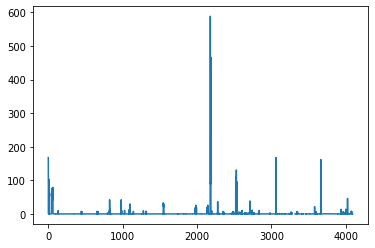

In [115]:
# 각 col std 값들을 그래프로 확인

x = list(range(0,data_30_std.shape[0]))
y = data_30_std
plt.plot(x,y)
plt.show()

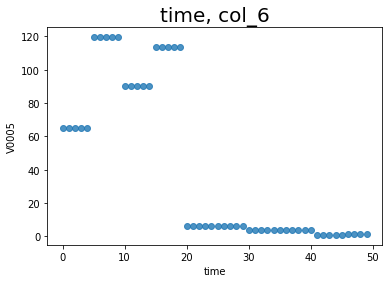

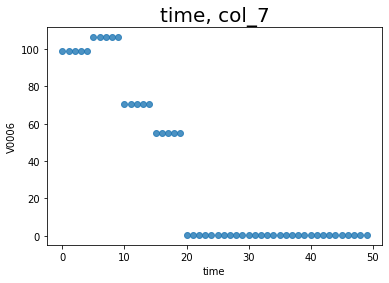

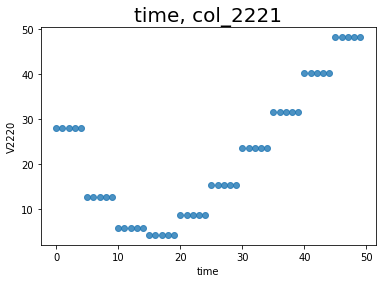

In [136]:
# 그래프로 확인

sns.regplot(x=data_30.iloc[:50,0],
            y=data_30.iloc[:50,6],
            fit_reg=False)
plt.title('time, col_6', fontsize=20)
plt.show()

sns.regplot(x=data_30.iloc[:50,0],
            y=data_30.iloc[:50,7],
            fit_reg=False)
plt.title('time, col_7', fontsize=20)
plt.show()

sns.regplot(x=data_30.iloc[:50,0],
            y=data_30.iloc[:50,2221],
            fit_reg=False)
plt.title('time, col_2221', fontsize=20)
plt.show()

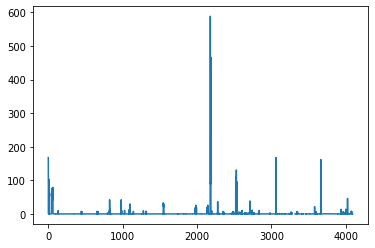

In [122]:
# 각 col std 값들을 그래프로 확인

x = list(range(0,data_30_std.shape[0]))
y = data_30_std
plt.plot(x,y)
plt.show()

# **182.csv : label 73**

In [78]:
# describe

data_182_des = data_182.describe()
data_182_std = data_182_des.loc['std']
display(data_182_des)

,time,V0000,V0001,V0002,V0003,V0004,V0005,V0006,V0007,V0008,V0009,V0010,V0011,V0012,V0013,V0014,V0015,V0016,V0017,V0018,V0019,V0020,V0021,V0022,V0023,V0024,V0025,V0026,V0027,V0028,V0029,V0030,V0031,V0032,V0033,V0034,V0035,V0036,V0037,V0038,...,V5081,V5082,V5083,V5084,V5085,V5086,V5087,V5088,V5089,V5090,V5091,V5092,V5093,V5094,V5095,V5096,V5097,V5098,V5099,V5100,V5101,V5102,V5103,V5104,V5105,V5106,V5107,V5108,V5109,V5110,V5111,V5112,V5113,V5114,V5115,V5116,V5117,V5118,V5119,V5120
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,6.000000e+02,600.0,600.000000,600.0,6.000000e+02,6.000000e+02,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,...,600.0,600.0,600.0,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.000000,600.000000,6.000000e+02,6.000000e+02,600.000000
mean,299.500000,30.470331,8.729442,8.706776,8.706617,8.708386,193.255254,194.101009,-1.177134e-20,0.0,-0.000006,0.0,-5.550149e-21,7.638605e-20,274.330666,273.838238,274.270005,273.894571,36.000849,36.004828,-1.000000e-04,-1.000000e-04,-1.000000e-04,-1.000000e-04,-1.000000e-04,-1.000000e-04,18.347124,2.573301,2.566122,36.001058,35.999954,36.000860,36.000952,36.000514,36.001311,-1.000000e-04,-1.000000e-04,-1.000000e-04,-1.000000e-04,-1.000000e-04,...,1.0,1.0,1.0,110.880982,110.877652,-0.294945,-0.235830,-0.195465,-0.157083,43.200315,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,60.0,0.212633,0.187105,-4.409014e-04,8.540000e+01,-0.000007
std,173.349358,0.011433,0.069983,0.016524,0.026808,0.020146,13.708464,25.603758,3.834504e-19,0.0,0.001271,0.0,1.630137e-18,6.558965e-18,0.815190,1.231853,0.953196,1.432967,0.027893,0.056941,1.152926e-18,1.152926e-18,1.152926e-18,1.152926e-18,1.152926e-18,1.152926e-18,0.008114,0.000739,0.000830,0.013034,0.012476,0.012945,0.013969,0.012253,0.012581,1.152926e-18,1.152926e-18,1.152926e-18,1.152926e-18,1.152926e-18,...,0.0,0.0,0.0,0.069707,0.072010,0.009535,0.008627,0.029026,0.015114,0.005611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.208432,4.583118,1.080605e-02,9.102536e-13,0.000183
min,0.000000,30.437763,8.521309,8.652751,8.612946,8.654660,153.316491,126.983794,-1.187580e-18,0.0,-0.003499,0.0,-5.860527e-18,-2.211064e-17,271.602542,270.647695,271.252092,270.119565,35.918647,35.844061,-1.000000e-04,-1.000000e-04,-1.000000e-04,-1.000000e-04,-1.000000e-04,-1.000000e-04,18.319644,2.570659,2.563281,35.962438,35.965182,35.938326,35.948766,35.967466,35.960804,-1.000000e-04,-1.000000e-04,-1.000000e-04,-1.000000e-04,-1.000000e-04,...,1.0,1.0,1.0,110.637633,110.688748,-0.323165,-0.259187,-0.298402,-0.204906,43.183666,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,60.0,0.000000,0.000000,-2.646926e-01,8.540000e+01,-0.004474
25%,149.750000,30.462508,8.682369,8.694615,8.686842,8.694820,183.850537,175.675944,-2.772707e-19,0.0,-0.000832,0.0,-1.014007e-18,-4.008946e-18,273.774182,273.031833,273.643523,272.902695,35.983019,35.963971,-1.000000e-04,-1.000000e-04,-1.000000e-04,-1.000000e-04,-1.000000e-04,-1.000000e-04,18.341759,2.572814,2.565568,35.991810,35.991720,35.992100,35.991875,35.992639,35.992764,-1.000000e-04,-1.000000e-04,-1.000000e-04,-1.000000e-04,-1.000000e-04,...,1.0,1.0,1.0,110.832716,110.826933,-0.300846,-0.241665,-0.213402,-0.166588,43.196703,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,60.0,0.000000,0.000000,-8.282331e-06,8.540000e+01,0.000000
50%,299.500000,30.4702

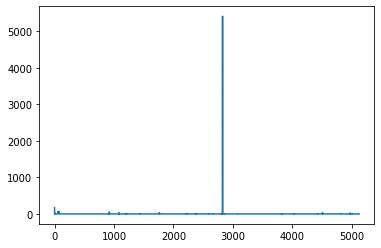

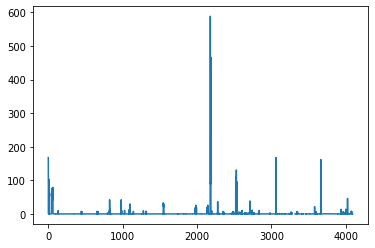

In [135]:
# col 각각의 std 그래프로 확인

x = list(range(0,data_182_std.shape[0]))
y = data_182_std
plt.plot(x,y)
plt.show()

a = list(range(0,data_30_std.shape[0]))
b = data_30_std
plt.plot(a,b)
plt.show()


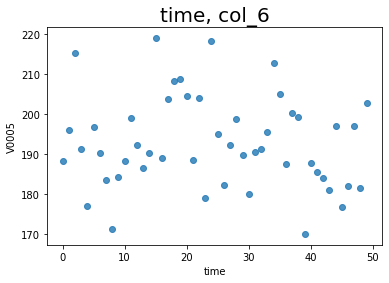

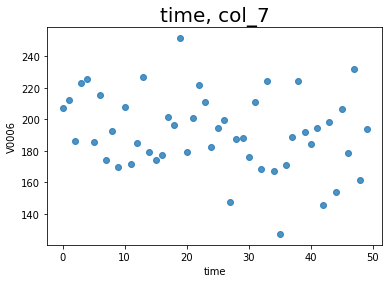

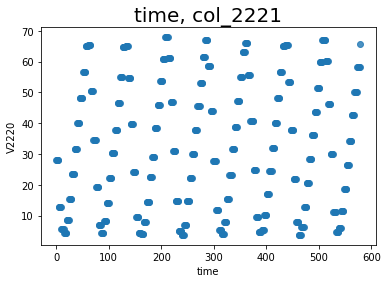

In [134]:
# 시간의 변화에 따른 col 값 분포 그래프로 확인

sns.regplot(x=data_182.iloc[:50,0],
            y=data_182.iloc[:50,6],
            fit_reg=False)
plt.title('time, col_6', fontsize=20)
plt.show()

sns.regplot(x=data_182.iloc[:50,0],
            y=data_182.iloc[:50,7],
            fit_reg=False)
plt.title('time, col_7', fontsize=20)
plt.show()

sns.regplot(x=data_30.iloc[:,0],
            y=data_30.iloc[:,2221],
            fit_reg=False)
plt.title('time, col_2221', fontsize=20)
plt.show()




In [103]:
data_30_corr = data_30.corr()
display(data_30_corr)

,time,V0000,V0001,V0002,V0003,V0004,V0005,V0006,V0007,V0008,V0009,V0010,V0011,V0012,V0013,V0014,V0015,V0016,V0017,V0018,V0025,V0026,V0027,V0028,V0029,V0030,V0031,V0032,V0033,V0040,V0041,V0042,V0043,V0044,V0045,V0046,V0047,V0048,V0049,V0050,...,V5004,V5005,V5006,V5007,V5008,V5009,V5010,V5011,V5012,V5013,V5014,V5015,V5016,V5017,V5018,V5019,V5020,V5021,V5022,V5023,V5024,V5025,V5074,V5075,V5076,V5077,V5078,V5079,V5080,V5084,V5085,V5086,V5087,V5088,V5089,V5090,V5116,V5117,V5118,V5120
time,1.000000,0.515615,-0.075628,0.247950,0.320392,0.258784,-0.167126,-0.333292,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.023618,-0.142763,0.061261,-0.061716,-0.555452,-0.524969,-0.106551,-0.297047,0.321351,-0.587191,-0.575820,-0.555808,-0.592290,-0.584511,-0.558011,-0.066497,-0.381248,-0.015050,-0.093378,-0.243257,-0.141898,0.000000e+00,-0.046779,0.010941,-0.274380,0.000000e+00,...,-0.400819,-0.542825,-0.575074,-0.569414,-0.427790,-0.524159,-0.610074,0.269748,-0.117676,0.095376,0.163137,0.413698,0.103029,-0.039025,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.122775,-0.517497,0.125237,-0.469159,0.472597,0.463530,-0.607036,0.513114,0.530745,0.467669,0.000000e+00,-0.480070,0.000000e+00,-0.592164,0.415545,0.565698,-0.412991,-0.433735
V0000,0.515615,1.000000,0.148146,-0.011371,0.488265,0.358905,-0.297671,-0.366131,-1.471321e-15,-2.454423e-15,-6.381370e-16,8.832289e-16,1.954813e-15,-3.868066e-15,-0.003479,0.060426,0.072305,-0.146651,0.015921,0.038864,-0.192606,-0.176756,0.154572,-0.008707,-0.005017,-0.010279,-0.016360,-0.004738,-0.015709,0.014462,0.004927,0.132301,0.011780,-0.258380,-0.034826,1.508535e-15,-0.023261,0.016419,-0.045321,8.832289e-16,...,-0.193949,-0.265479,-0.142219,-0.163723,-0.172604,-0.152623,-0.259880,0.011767,-0.295798,0.079387,-0.007607,0.240919,0.028205,-0.189336,-2.868089e-15,-9.208252e-16,-1.073505e-15,-3.642264e-15,1.261884e-15,1.261884e-15,3.250564e-15,5.007214e-16,0.441779,-0.490789,0.453074,-0.474079,0.391033,0.397942,-0.277699,0.521729,0.528304,0.204087,1.774182e-15,0.021297,2.793813e-15,-0.232705,0.003060,0.061344,-0.744095,0.002326
V0001,-0.075628,0.148146,1.000000,-0.149185,0.006574,0.155567,-0.287827,-0.279153,6.609373e-14,-6.588324e-14,6.610049e-14,-6.593778e-14,6.630343e-14,-6.633870e-14,-0.012125,0.044387,-0.176443,0.100883,0.296788,0.335296,0.020601,-0.035520,-0.039410,0.317481,0.308859,0.324692,0.314395,0.322104,0.314770,0.157290,-0.092531,-0.060292,0.088201,-0.042141,0.136277,6.609865e-14,0.102531,0.066547,-0.133651,-6.593778e-14,...,-0.092850,-0.126391,-0.170839,-0.194705,-0.144946,-0.236096,-0.126293,0.103309,-0.093860,-0.047965,-0.198963,0.176608,0.093559,0.019509,-6.601658e-14,-6.607951e-14,-6.582574e-14,-6.602975e-14,-6.631876e-14,-6.631876e-14,-6.568855e-14,6.623353e-14,0.331238,0.184350,0.335609,0.220165,0.028808,0.010859,-0.204938,0.028989,0.036293,-0.112295,6.612927e-14,0.238289,6.616735e-14,-0.186364,-0.286605,-0.308143,-0.174387,0.315817
V0002,0.247950,-0.011371,-0.149185,1.000000,-0.103074,-0.052637,0.181353,0.140806,1.377700e-12,-1.377556e-12,1.377766e-12,-1.377557e-12,1.377980e-12,-1.377789e-12,-0.046967,-0.185332,-0.075940,0.099082,-0.241679,-0.300592,0.150213,-0.145152,0.144296,-0.265477,-0.260635,-0.276161,-0.257199,-0.259193,-0.269683,0.076447,-0.004446,-0.090917,-0.004900,-0.173455,-0.026316,1.377530e-12,0.036916,0.068277,-0.139238,-1.377557e-12,...,-0.034963,-0.075005,-0.194217,-0.118944,-0.142529,-0.089656,-0.098855,0.175862,-0.053629,-0.058186,0.130768,0.164678,0.111933,0.144026,-1.377808e-12,-1.377687e-12,-1.377365e-12,-1.377650e-12,-1.378054e-12,-1.378054e-12,-1.377843e-12,1.377816e-12,-0.262730,-0.034176,-0.239644,-0.059227,-0.106156,-0.108163,-0.140263,-0.179085,-0.171204,0.197174,1.377687e-12,-0.071801,1.377518e-12,-0.142689,0.084062,0.218249,0.176855,-0.036694
V0003,0.320392,0.488265,0.006574,-0.103074,1.000000,0.224167,-0.301257,-0.313124,7.593046e-14,-7.588942e-14,7.585969e-14,-7.629848e-14,7

In [0]:
k = data_30_corr.sort_values(by=['time'], axis=0, ascending=False)


In [111]:
k.iloc[:,0][0:30]

time     1.000000
V2221    0.997176
V2382    0.997176
V3001    0.996058
V2218    0.995653
V2378    0.995653
V2998    0.995518
V2995    0.994199
V3000    0.993197
V2994    0.992453
V2997    0.992061
V1191    0.991285
V1133    0.991285
V2383    0.986989
V2222    0.986989
V2235    0.984379
V2392    0.984379
V2976    0.983802
V2986    0.982986
V3443    0.981571
V3331    0.980085
V2985    0.978509
V3439    0.966299
V3444    0.965276
V3441    0.961536
V3440    0.956525
V3442    0.953817
V2837    0.944904
V2830    0.944904
V0454    0.943239
Name: time, dtype: float64